In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data/final_data/ratios_plbs_agg_100_autosect.xlsx')

In [4]:
df.head()

Co_Code        CO_NAME  Year End  Current Ratio  PBIDTM (%)  PBITM (%)  \
0       31  Ashok Leyland    200003           2.48       11.64       8.56   
1       31  Ashok Leyland    200103           2.20       12.08       8.77   
2       31  Ashok Leyland    200203           1.87       12.71       9.18   
3       31  Ashok Leyland    200303           1.71       11.80       8.50   
4       31  Ashok Leyland    200403           1.58       11.11       8.69   

   PBDTM (%)  CPM (%)  APATM (%)     PAT  ...    [PBIDT or OP  [Other Income  \
0       6.57     6.01       2.93   78.49  ...          119.98           1.15   
1       7.13     6.74       3.43   91.68  ...          136.39           2.56   
2       8.44     6.96       3.42   92.26  ...          138.98           9.44   
3       8.74     7.14       3.85  120.21  ...          121.67           6.82   
4       9.62     7.29       4.86  193.58  ...          153.34           5.69   

   EBITDA  [SellingampAdministrative Expenses    EBIT  \
0  118.83                                 0.0   99.00   
1  133.83                                 0.0  109.34   
2  129.54                                 0.0  103.77   
3  114.85                                 0.0   90.20   
4  147.65                                 0.0  122.54   

   [Reported Profit After Tax  [Raw Material Consumed  [TOTAL EXPENDITURE  \
0                       67.01                  407.18              640.32   
1                       77.06                  497.45              692.85   
2                       69.63                  462.22              638.55   
3                       66.34                  496.32              791.18   
4                       87.32                  726.79              971.93   

    TC-RM   [Tax  
0  233.14  12.64  
1  195.40   8.76  
2  176.33  27.70  
3  294.86  19.95  
4  245.14  34.78  

[5 rows x 64 columns]

In [24]:
df.columns[2]

'Year End'

In [12]:
def plot_graph(df , cmpy_name='Ashok Leyland' , col_name = 'EBIT'):
    sub = df[df.CO_NAME==cmpy_name]
    sub.sort_values(by='Year End',inplace=True)
    return sub[['Year End',col_name]]

In [16]:
cmpy_name='Ashok Leyland'

In [17]:
sub = df[df.CO_NAME==cmpy_name]

In [22]:
sub.sort_values(by='EBIT',inplace=True)

/Users/nithishreddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
x = plot_graph(df)

Prepare PE data for validating clusters

In [3]:
bse = pd.read_excel('./data/raw_data/bse_pe_qrtrly.xlsx')
nse = pd.read_excel('./data/raw_data/nse_pe_qrtrly.xlsx')

In [28]:
nse.columns

Index(['Co_Code', 'Co_Name', 'Year End', 'Year & Month', 'Price to Earning'], dtype='object')

In [4]:
nse_comps = [i for i in nse.Co_Name.unique() if i not in bse.Co_Name.unique()]

In [5]:
#combine nse and bse dataframes
nse = nse[nse.Co_Name.isin(nse_comps)]

In [6]:
bse = bse.iloc[:,1:]
nse = nse.iloc[:,1:]

In [7]:
nse.rename(columns= dict((i,j) for i,j in zip(nse.columns,bse.columns) ) , inplace=True)

In [8]:
comb = pd.concat([bse,nse])

In [9]:
#reading the cluster.csv
sheet_name = input('enter the number of clusters')+'clusters'
cluster = pd.read_excel('./data/15_18.xlsx',sheet_name=sheet_name)

In [10]:
cluster_dict  = dict((i,cluster[i].dropna().tolist()) for i in cluster.columns)

In [21]:
df.columns[37]

'Fixed_Asset_Turnover'

In [14]:
df.columns[15]

'Debt-Equity Ratio'

In [22]:
def fat_median(co_name='Ashok Leyland' , comb= df):
    l = comb.loc[comb.CO_NAME==co_name,df.columns[37]].tolist()
    return np.median(l)

In [23]:
cluster_dict_med_values = list(cluster_dict.values())
cluster_dict_med_values = [[fat_median(j) for j in i] for i in cluster_dict_med_values]

Text(0.5,1,'median Fixed Asset Turnover across time steps \n each dot is company  ')

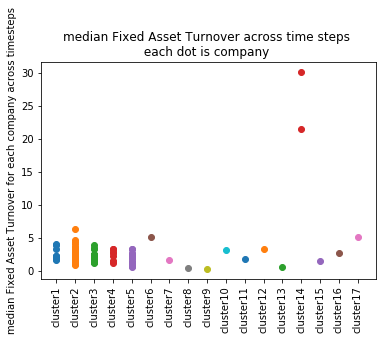

In [24]:
fig,ax = plt.subplots()
for i_num,i in enumerate(cluster_dict_med_values):
    ax.scatter([i_num+1]*len(i),i)
plt.xticks(range(1,18) , ['cluster'+str(i) for i in range(1,18)] , rotation=90)
plt.ylabel('median Fixed Asset Turnover for each company across timesteps')
plt.title('median Fixed Asset Turnover across time steps \n each dot is company  ')

In [25]:
def debt_equity_ratio(co_name='Ashok Leyland' , comb= df):
    l = comb.loc[comb.CO_NAME==co_name,df.columns[15]].tolist()
    return np.median(l)

In [26]:
cluster_dict_med_values = list(cluster_dict.values())
cluster_dict_med_values = [[debt_equity_ratio(j) for j in i] for i in cluster_dict_med_values]

Text(0.5,1,'median Debt Equity Ratio across time steps \n each dot is company  ')

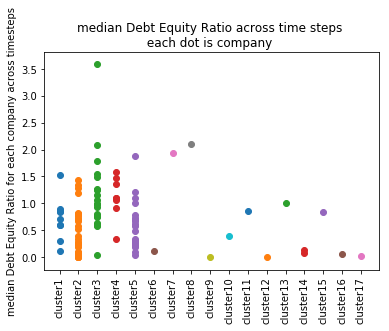

In [27]:
fig,ax = plt.subplots()
for i_num,i in enumerate(cluster_dict_med_values):
    ax.scatter([i_num+1]*len(i),i)
plt.xticks(range(1,18) , ['cluster'+str(i) for i in range(1,18)] , rotation=90)
plt.ylabel('median Debt Equity Ratio for each company across timesteps')
plt.title('median Debt Equity Ratio across time steps \n each dot is company  ')

In [218]:
def pe_median(co_name='Ashok Leyland' , comb= comb):
    l = comb.loc[comb.Co_Name==co_name,'Price to Earnings  (PE)'].tolist()
    return np.median(l)

In [219]:
cluster_dict_med_values = list(cluster_dict.values())

In [220]:
cluster_dict_med_values = [[pe_median(j) for j in i] for i in cluster_dict_med_values]

Text(0.5,1,'median PE across time steps \n each dot is company  ')

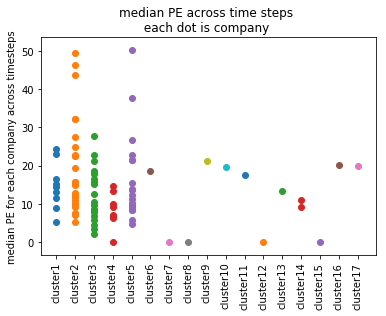

In [221]:
fig,ax = plt.subplots()
for i_num,i in enumerate(cluster_dict_med_values):
    ax.scatter([i_num+1]*len(i),i)
plt.xticks(range(1,18) , ['cluster'+str(i) for i in range(1,18)] , rotation=90)
plt.ylabel('median PE for each company across timesteps')
plt.title('median PE across time steps \n each dot is company  ')

In [235]:
def roe_median(co_name='Ashok Leyland' , comb= df):
    l = comb.loc[comb.CO_NAME==co_name,df.columns[10]].tolist()
    return np.median(l)

In [240]:
cluster_dict_med_values = list(cluster_dict.values())

In [241]:
cluster_dict_med_values = [[roe_median(j) for j in i] for i in cluster_dict_med_values]

Text(0.5,1,'median ROE across time steps \n each dot is company  ')

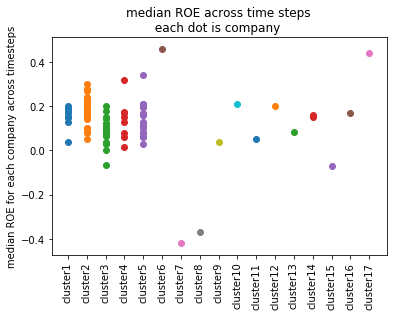

In [242]:
fig,ax = plt.subplots()
for i_num,i in enumerate(cluster_dict_med_values):
    ax.scatter([i_num+1]*len(i),i)
plt.xticks(range(1,18) , ['cluster'+str(i) for i in range(1,18)] , rotation=90)
plt.ylabel('median ROE for each company across timesteps')
plt.title('median ROE across time steps \n each dot is company  ')

In [244]:
df.columns[11]

'ROCE (%)'

In [245]:
def roce_median(co_name='Ashok Leyland' , comb= df):
    l = comb.loc[comb.CO_NAME==co_name,df.columns[11]].tolist()
    return np.median(l)

In [246]:
cluster_dict_med_values = list(cluster_dict.values())
cluster_dict_med_values = [[roce_median(j) for j in i] for i in cluster_dict_med_values]

Text(0.5,1,'median ROCE across time steps \n each dot is company  ')

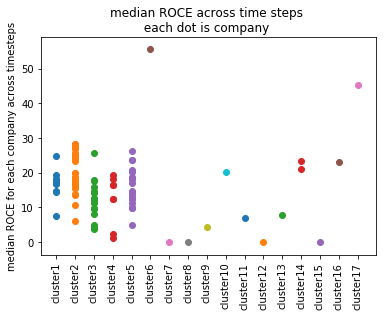

In [247]:
fig,ax = plt.subplots()
for i_num,i in enumerate(cluster_dict_med_values):
    ax.scatter([i_num+1]*len(i),i)
plt.xticks(range(1,18) , ['cluster'+str(i) for i in range(1,18)] , rotation=90)
plt.ylabel('median ROCE for each company across timesteps')
plt.title('median ROCE across time steps \n each dot is company  ')

In [16]:
df['ebit_by_net_sales'] = df['EBIT']/df['[Net Sales']

In [17]:
def ebit_(co_name='Ashok Leyland' , comb= df):
    l = comb.loc[comb.CO_NAME==co_name,'ebit_by_net_sales'].tolist()
    return np.median(l)

In [18]:
cluster_dict_med_values = list(cluster_dict.values())
cluster_dict_med_values = [[ebit_(j) for j in i] for i in cluster_dict_med_values]

/Users/nithishreddy/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [22]:
for i in cluster_dict_med_values:
    print(len(i))

9
28
19
8
19
1
1
1
1
1
1
1
1
2
1
1
1


In [261]:
list(cluster_dict.keys())

[1, 15, 13, 5, 14, 4, 12, 11, 8, 6, 9, 0, 10, 7, 3, 2, 16]

Text(0.5,1,'Ebit/Net Sales  \n each dot is company  ')

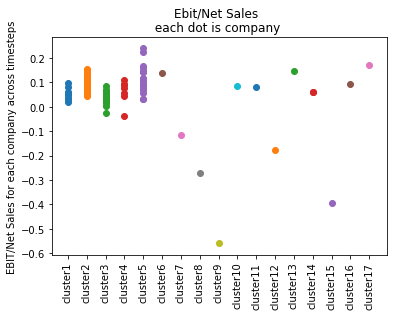

In [260]:
fig,ax = plt.subplots()
for i_num,i in enumerate(cluster_dict_med_values):
    ax.scatter([i_num+1]*len(i),i)
plt.xticks(range(1,18) , ['cluster'+str(i) for i in range(1,18)] , rotation=90)
plt.ylabel('EBIT/Net Sales for each company across timesteps')
plt.title('Ebit/Net Sales  \n each dot is company  ')

In [32]:
list4 = cluster_dict_med_values[3]

In [31]:
list4_comps = list(cluster_dict.values())[3]

In [33]:
len(list4_comps) , len(list4)

(8, 8)

In [54]:
list4

[0.05652564014079647,
 0.11095811818703384,
 0.08970498003769617,
 -0.038087074072140126,
 0.07692693497909683,
 0.09203410028416904,
 0.045198411184204236,
 nan]

In [55]:
list4_comps

['Bharat Gears',
 'Setco Automotive',
 'RACL Geartech',
 'Scooters India',
 'Talbros Engg.',
 'JBM Auto',
 'Rane (Madras)',
 'Rane Engine Val.']

In [50]:
list4_comps[np.argmin(list4)]

'Rane Engine Val.'

In [36]:
list5 = cluster_dict_med_values[4]

In [35]:
list5_comps = list(cluster_dict.values())[4]

In [37]:
len(list5) , len(list5_comps)

(19, 19)

In [38]:
list5

[0.11679177144585831,
 0.08392018779342722,
 0.06757190731191479,
 0.031746031746031744,
 0.223980523432745,
 0.08312976492395246,
 0.10737016030175639,
 0.14528269851151737,
 0.1157202191725183,
 0.07371794871794872,
 0.15922679299268494,
 0.08887456047352771,
 0.09251883497964403,
 0.14317522434383642,
 0.14148905529953917,
 0.24089635854341737,
 0.03209585027766846,
 0.057939914163090134,
 0.16579173838209982]

In [40]:
z = 

'IST'

In [41]:
z = [x for _,x in sorted(zip(list5,list5_comps))]

In [43]:
list5_comps

['Exide Inds.',
 'Him Teknoforg.',
 'Talbros Auto.',
 'IST',
 'Shanthi Gears',
 'Banco Products',
 'Steel Str. Wheel',
 'VST Till. Tract.',
 'IP Rings',
 'Triton Valves',
 'Menon Bearings',
 'Frontier Springs',
 'JMT Auto',
 'NRB Bearings',
 'Shriram Pistons',
 'SNL Bearings',
 'REIL Electricals',
 'Menon Pistons',
 'Castex Tech']

In [42]:
z

['IST',
 'REIL Electricals',
 'Menon Pistons',
 'Talbros Auto.',
 'Triton Valves',
 'Banco Products',
 'Him Teknoforg.',
 'Frontier Springs',
 'JMT Auto',
 'Steel Str. Wheel',
 'IP Rings',
 'Exide Inds.',
 'Shriram Pistons',
 'NRB Bearings',
 'VST Till. Tract.',
 'Menon Bearings',
 'Castex Tech',
 'Shanthi Gears',
 'SNL Bearings']